# Study $r(z)$ in the generator level for different pion origins
last edit Aug-17, 2023

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
# from event_selection_tools        import *;

Welcome to JupyROOT 6.26/06
Loaded bin migration and acceptance weights from MC calculations.


In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

In [3]:
clasdis_path = '/Users/erezcohen/Desktop/data/BAND/CLASDIS/eventfiles/our_kinematics/';
claspyth_path = '/Users/erezcohen/Desktop/data/BAND/CLASPYTH/eventfiles/our_kinematics/';
figures_path = '/Users/erezcohen/Desktop/Projects/SIDIS/FragmentationAnalysis/AnalysisNote/Figures/MC/CLASDIS/'

# (1) Load simulation files and apply kinematical selection cuts

## (1.1) CLASPYTH
Since with CLASPYTH we can not simulate a deuteron target, we merge the simulations of a proton and a neutron targets

In [4]:
e_e_pi_claspyth = dict()

for runnum in range(1):
    
    # neutron target
    xsec_n_nb = 0
    df_n_pips = pd.read_csv(claspyth_path + 'claspytn0.00.e10.600.emn1.00tmn5.0.xs%d_pips.csv'%(xsec_n_nb));
    df_n_pims = pd.read_csv(claspyth_path + 'claspytn0.00.e10.600.emn1.00tmn5.0.xs%d_pims.csv'%(xsec_n_nb));
    # proton target
    xsec_p_nb = 0
    df_p_pips = pd.read_csv(claspyth_path + 'claspytp+.00.e10.600.emn1.00tmn5.0.xs%d_pips.csv'%(xsec_p_nb));
    df_p_pims = pd.read_csv(claspyth_path + 'claspytp+.00.e10.600.emn1.00tmn5.0.xs%d_pims.csv'%(xsec_p_nb));

    # merge - deuteron target
    xsec_d_nb = xsec_n_nb + xsec_p_nb;
    df_pips = pd.concat([df_n_pips, df_p_pips])
    df_pims = pd.concat([df_n_pims, df_p_pims])
    
    # Add Zpi variable which is mislabeled here as pi_Z
    df_pips['Zpi'] = df_pips['pi_Z']
    df_pims['Zpi'] = df_pims['pi_Z']
    
    if runnum==0:
        xsec_claspyth = xsec_d_nb;
        e_e_pi_claspyth['piplus']  = df_pips
        e_e_pi_claspyth['piminus'] = df_pims
    else:
        e_e_pi_claspyth['piplus']  = pd.concat([e_e_pi_claspyth['piplus'] ,df_pips])
        e_e_pi_claspyth['piminus'] = pd.concat([e_e_pi_claspyth['piminus'],df_pims])
    
print('Loaded %d π+ events and %d π- events'%(len(e_e_pi_claspyth['piplus']),len(e_e_pi_claspyth['piminus'])))

Loaded 10768393 π+ events and 10581247 π- events


In [5]:
for pi_ch,pi_idx in zip(pi_charge_names,[1,2]):
    e_e_pi_claspyth[pi_ch]["pi_DC_sector"]    = 1
e_e_pi_claspyth_after_acceptance_matching_cut = apply_p_theta_acceptance_cut_single_set( e_e_pi_claspyth )

Apply a π+/π- acceptance matching cut on the in p-theta plane
Applying p-theta on cut for piplus which includes 10768393 events
Applying p-theta on cut for piplus on 10768393 events
10768393 in sector 1


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1730: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


0 in sector 2


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1730: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


0 in sector 3


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1730: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


0 in sector 4


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1730: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


0 in sector 5


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1730: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


0 in sector 6
Applying p-theta on cut for piminus which includes 10581247 events


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1730: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


Applying p-theta on cut for piminus on 10581247 events
10581247 in sector 1


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1730: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


0 in sector 2


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1730: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


0 in sector 3


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1730: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


0 in sector 4
0 in sector 5


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1730: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1730: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


0 in sector 6


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1730: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);


In [6]:
e_e_pi_claspyth_after_Mx_cut                  = apply_Mx_cut( e_e_pi_claspyth_after_acceptance_matching_cut )
e_e_pi_claspyth_after_Kinematical_cuts        = apply_Kinematical_cuts( e_e_pi_claspyth_after_Mx_cut, W_min=2.5 )
e_e_pi_claspyth_pass_cuts                     = e_e_pi_claspyth_after_Kinematical_cuts;

Apply a cut on the missing mass of a (e,e'π) reaction: 1.7<Mx<5.0 GeV/c2


In [7]:
print('Retained %d π+ events and %d π- events'%(len(e_e_pi_claspyth_pass_cuts['piplus']),len(e_e_pi_claspyth_pass_cuts['piminus'])))

Retained 2073830 π+ events and 1515932 π- events


# (2) Separate different pion origins

(1) $\pi$ prodcued directly from quarks

(2) $\pi$ prodcued from non-diffractive $\rho$ production (nuclear fragmentation) - $M_x^{(e,e'\rho)} > 1.4$ GeV/c$^2$

(3) $\pi$ produced from diffractive $\rho$ production - $1.4 > M_x^{(e,e'\rho)}$ GeV/c$^2$

In [8]:
Mx_diffractive = 1.4 # GeV/c2

e_e_pi_claspyth_pass_cuts_direct              = dict() 
e_e_pi_claspyth_pass_cuts_diffractive_rho     = dict()
e_e_pi_claspyth_pass_cuts_non_diffractive_rho = dict()

for pi_ch,pi_idx in zip(pi_charge_names,[1,2]):
    df = e_e_pi_claspyth_pass_cuts[pi_ch]
    df = df[df.pi_Z > 0.3]

    pi_from_rho = df[(df.pi_parent_PDG==113)|(df.pi_parent_PDG==213)|(df.pi_parent_PDG==-213)]
    
    M_x_rho             = pi_from_rho.M_x_rho
    diffractive_rho     = pi_from_rho[pi_from_rho.M_x_rho < Mx_diffractive]
    non_diffractive_rho = pi_from_rho[Mx_diffractive < pi_from_rho.M_x_rho ]
    
    e_e_pi_claspyth_pass_cuts_direct[pi_ch]              = df[(df.pi_parent_PDG==2)|(df.pi_parent_PDG==-2)|(df.pi_parent_PDG==91)|(df.pi_parent_PDG==92)|(df.pi_parent_PDG==93)]
    e_e_pi_claspyth_pass_cuts_diffractive_rho[pi_ch]     = diffractive_rho
    e_e_pi_claspyth_pass_cuts_non_diffractive_rho[pi_ch] = non_diffractive_rho


# (3) Extract $\pi^+/\pi^-$ ratio
Cross-section ratio is extracted with no correction weight, as these quasi-data from from the generator and no weights are required

In [48]:
z_bins   = np.arange(0.3,0.8,0.05)
z_widths = 0.01*np.ones(len(z_bins))
x_bins   = np.linspace(0.22,0.62,11)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2

In [49]:
var_label = "standing proton x"
var       = 'xB'
xlabel    = "Bjorken $x$"

In [50]:
results_path = '/Users/erezcohen/Desktop/data/BAND/Results/' + 'Results_18Aug2023/'

In [51]:
data_path= results_path + 'Q2_bins/'
if not os.path.exists(data_path): os.makedirs(data_path)
Q2_min_arr = np.arange(2,7,1)
Q2_max_arr = Q2_min_arr + 1

In [52]:
prefix   = 'CLASPYTHdirect_SIDIS_ratio_'
for Q2_min,Q2_max,indcs in zip(Q2_min_arr,Q2_max_arr,range(10)):
    suffix   = '_%.1f_Q2_%.1f'%(Q2_min,Q2_max)
    print('extracting SIDIS Xsec ratio for ',suffix)
    extract_SIDIS_Xsec_ratio(df_dict  = e_e_pi_claspyth_pass_cuts_direct, 
                        x_var    = var ,
                        x_bins   = x_bins,
                        z_bins   = z_bins,
                        z_widths = z_widths,          
                        fdebug   = 0,
                        data_path= data_path,
                        prefix   = prefix, 
                        suffix   = suffix,
                        Q2_min   = Q2_min,
                        Q2_max   = Q2_max, 
                        weight_option = ''
                       )
# print('done.')

extracting SIDIS Xsec ratio for  _2.0_Q2_3.0
extracting SIDIS Xsec ratio for  _3.0_Q2_4.0
extracting SIDIS Xsec ratio for  _4.0_Q2_5.0
extracting SIDIS Xsec ratio for  _5.0_Q2_6.0


/opt/homebrew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


extracting SIDIS Xsec ratio for  _6.0_Q2_7.0


## (3.1) Bining in $Q^2$ and $p_T$

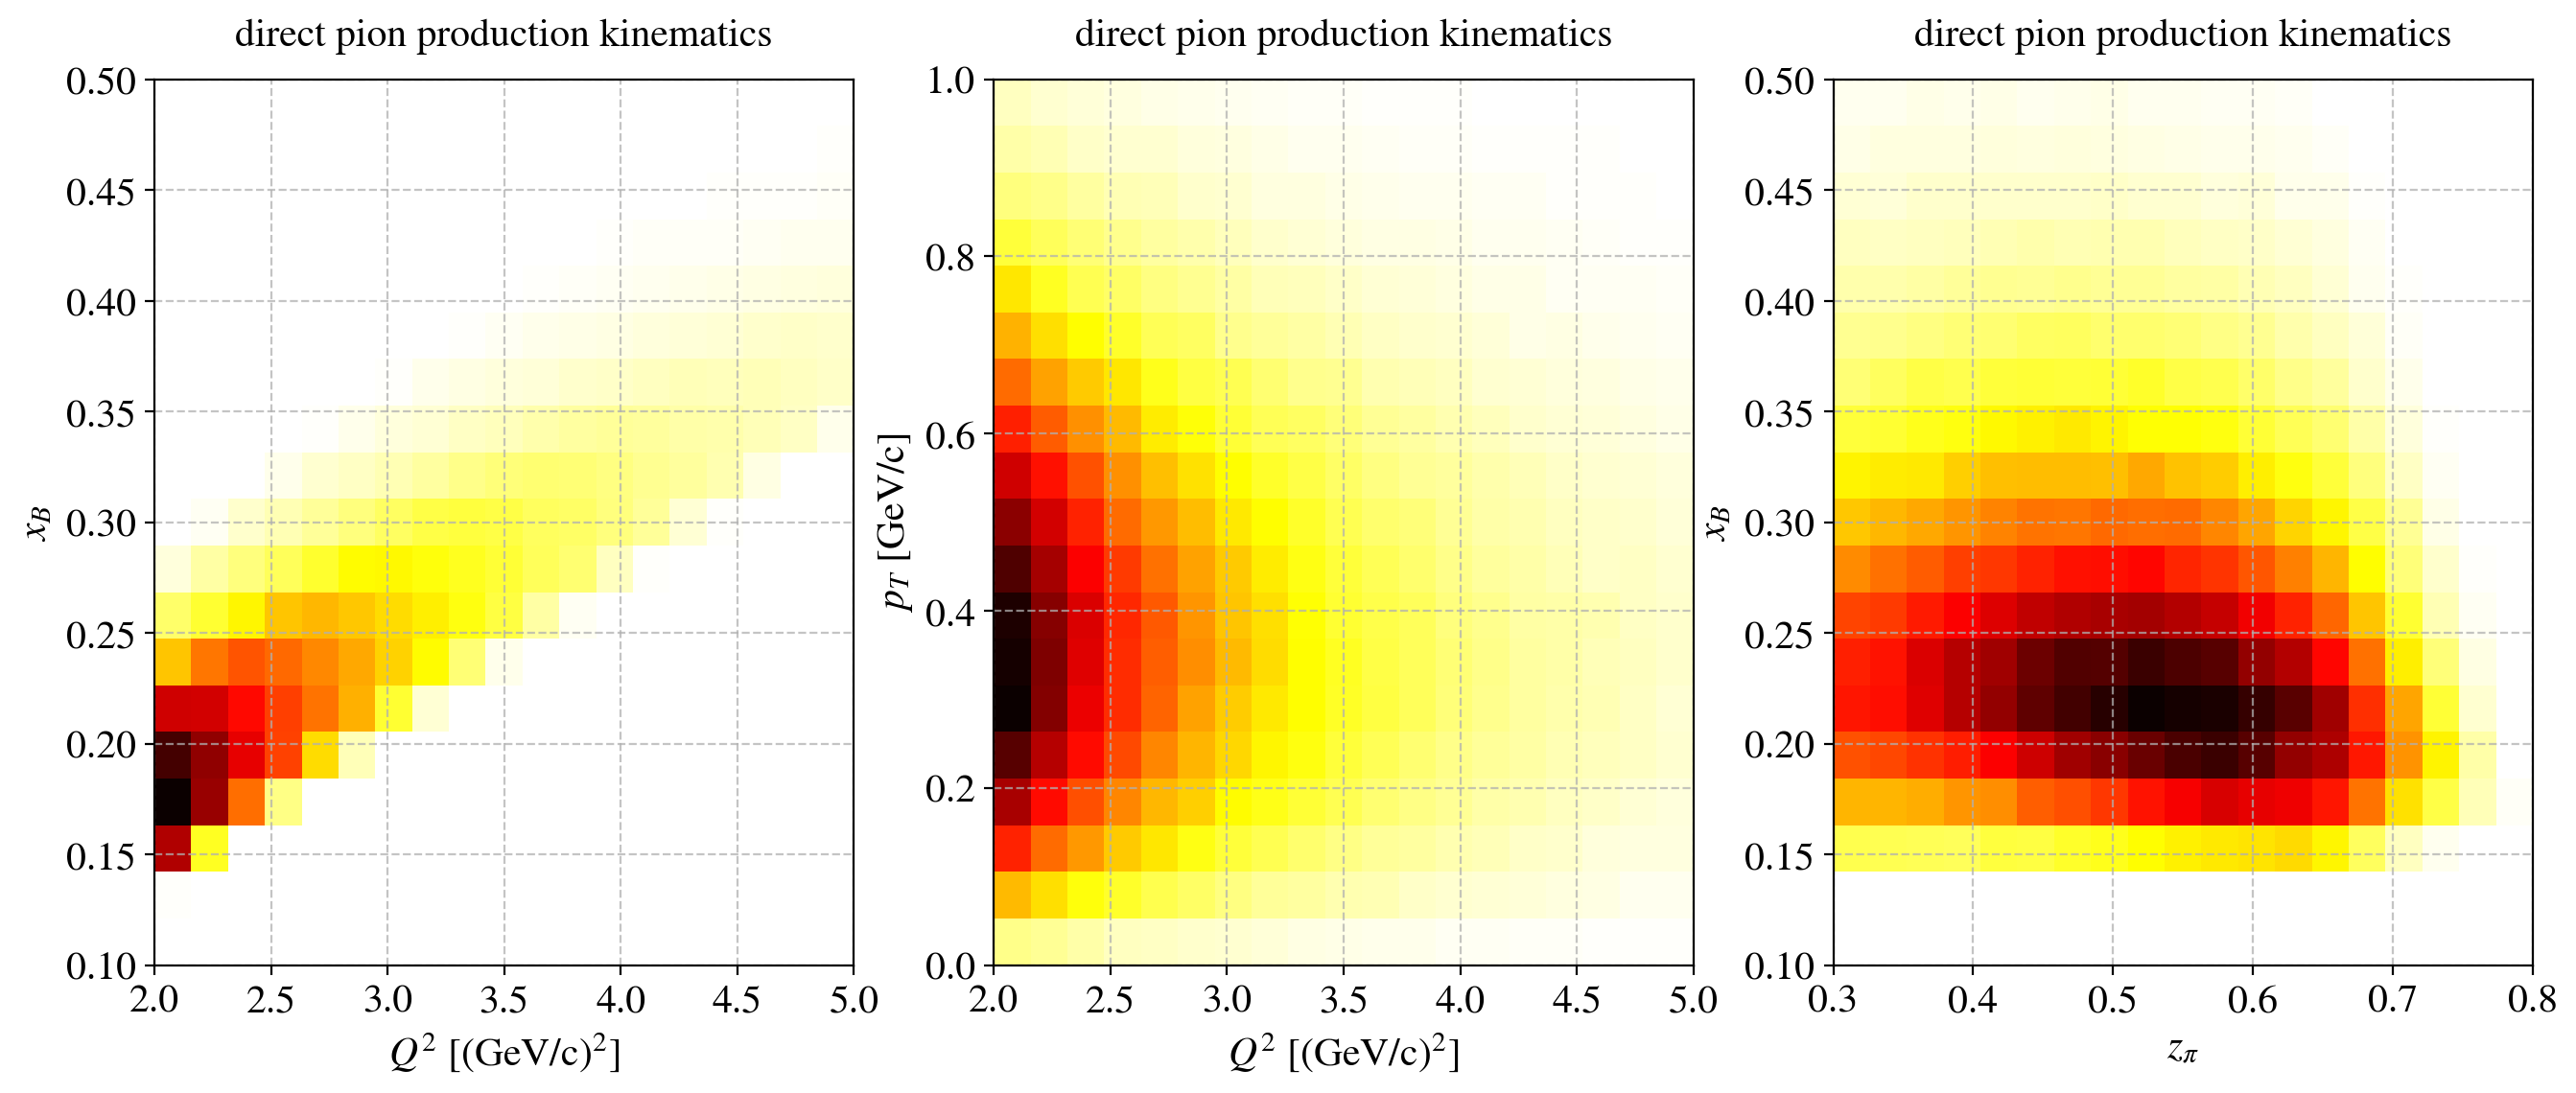

In [115]:
fig=plt.figure(figsize=(16,6));
ax = fig.add_subplot(1,3,1);
plt.hist2d(e_e_pi_claspyth_pass_cuts_direct['piplus'].Q2,e_e_pi_claspyth_pass_cuts_direct['piplus'].xB, 
           bins=(np.linspace(2,5,20),np.linspace(0.1,0.5,20)), cmap='hot_r');
set_axes(ax,'$Q^2$ [(GeV/c)$^2$]','$x_B$',title='direct pion production kinematics',do_add_grid=True,fontsize=15);

ax = fig.add_subplot(1,3,2);
plt.hist2d(e_e_pi_claspyth_pass_cuts_direct['piplus'].Q2,e_e_pi_claspyth_pass_cuts_direct['piplus'].pi_qFrame_pT, 
           bins=(np.linspace(2,5,20),np.linspace(0.,1.,20)), cmap='hot_r');
set_axes(ax,'$Q^2$ [(GeV/c)$^2$]','$p_T$ [GeV/c]',title='direct pion production kinematics',do_add_grid=True,fontsize=15);

ax = fig.add_subplot(1,3,3);
plt.hist2d(e_e_pi_claspyth_pass_cuts_direct['piplus'].Zpi,e_e_pi_claspyth_pass_cuts_direct['piplus'].xB, 
           bins=(np.linspace(0.3,0.8,20),np.linspace(0.1,0.5,20)), cmap='hot_r');
set_axes(ax,'$z_\pi$','$x_B$',title='direct pion production kinematics',do_add_grid=True,fontsize=15);



In [116]:
df_dict = e_e_pi_claspyth_pass_cuts_direct;
df = df_dict['piplus']
# df.M_x

In [131]:
dpT = 0.3
pT_min_arr = np.arange(0,0.9,dpT)
pT_max_arr = pT_min_arr + dpT
pT_min_arr, pT_max_arr

(array([0. , 0.3, 0.6]), array([0.3, 0.6, 0.9]))

In [132]:
for Q2_min,Q2_max in zip([2.,3.,4.],[3.,4.,5.]):
    data_path= results_path + 'pT_bins_%.1f_Q2_%.1f/'%(Q2_min,Q2_max)
    if not os.path.exists(data_path): os.makedirs(data_path)

    for pT_min,pT_max in zip(pT_min_arr,pT_max_arr):
        suffix   = '_%.2f_pT_%.2f'%(pT_min,pT_max)
        print(suffix)
        extract_SIDIS_Xsec_ratio(df_dict  = e_e_pi_claspyth_pass_cuts_direct, 
                                x_var    = var ,
                                x_bins   = x_bins,
                                z_bins   = z_bins,
                                z_widths = z_widths,          
                                fdebug   = 0,
                                data_path= data_path,
                                prefix   = prefix, 
                                suffix   = suffix,
                                Q2_min   = Q2_min,
                                Q2_max   = Q2_max, 
                                weight_option = '',
                                pT_min   = pT_min,
                                pT_max   = pT_max,
                           )
    print('Done %.1f<Q2<%.1f'%(Q2_min,Q2_max))
print('done.')

_0.00_pT_0.30
_0.30_pT_0.60
_0.60_pT_0.90
Done 2.0<Q2<3.0
_0.00_pT_0.30
_0.30_pT_0.60
_0.60_pT_0.90


/opt/homebrew/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Done 3.0<Q2<4.0
_0.00_pT_0.30
_0.30_pT_0.60
_0.60_pT_0.90
Done 4.0<Q2<5.0
done.


# (4) Extract $r(z)$ from $\pi^+/\pi^-$ ratio

In [133]:
prefix    = 'CLASPYTHdirect_SIDIS_ratio_'
data_path = results_path + 'Q2_bins'
suffixes  = ['_2.0_Q2_3.0','_3.0_Q2_4.0','_4.0_Q2_5.0']

In [134]:
xB_selected = 0.32
Delta_xB    = 0.02
r_Results   = extract_r_from_SIDIS_ratio(data_path = data_path,                                                             
                                         prefix  = prefix,suffixes = suffixes, 
                                         xB_selected = xB_selected,Delta_xB=Delta_xB,
                                         fdebug=0)

[z_arr,z_errdw_arr,z_errup_arr, 
 r_arr, r_errup_arr, r_errdw_arr, 
 r_corrected_arr, r_corrected_errup_arr, r_corrected_errdw_arr] = r_Results

Done loading CLASPYTHdirect_SIDIS_ratio_ SIDIS results and extracting r for x=0.32.
From /Users/erezcohen/Desktop/data/BAND/Results/Results_18Aug2023/Q2_bins
For ['_2.0_Q2_3.0', '_3.0_Q2_4.0', '_4.0_Q2_5.0']


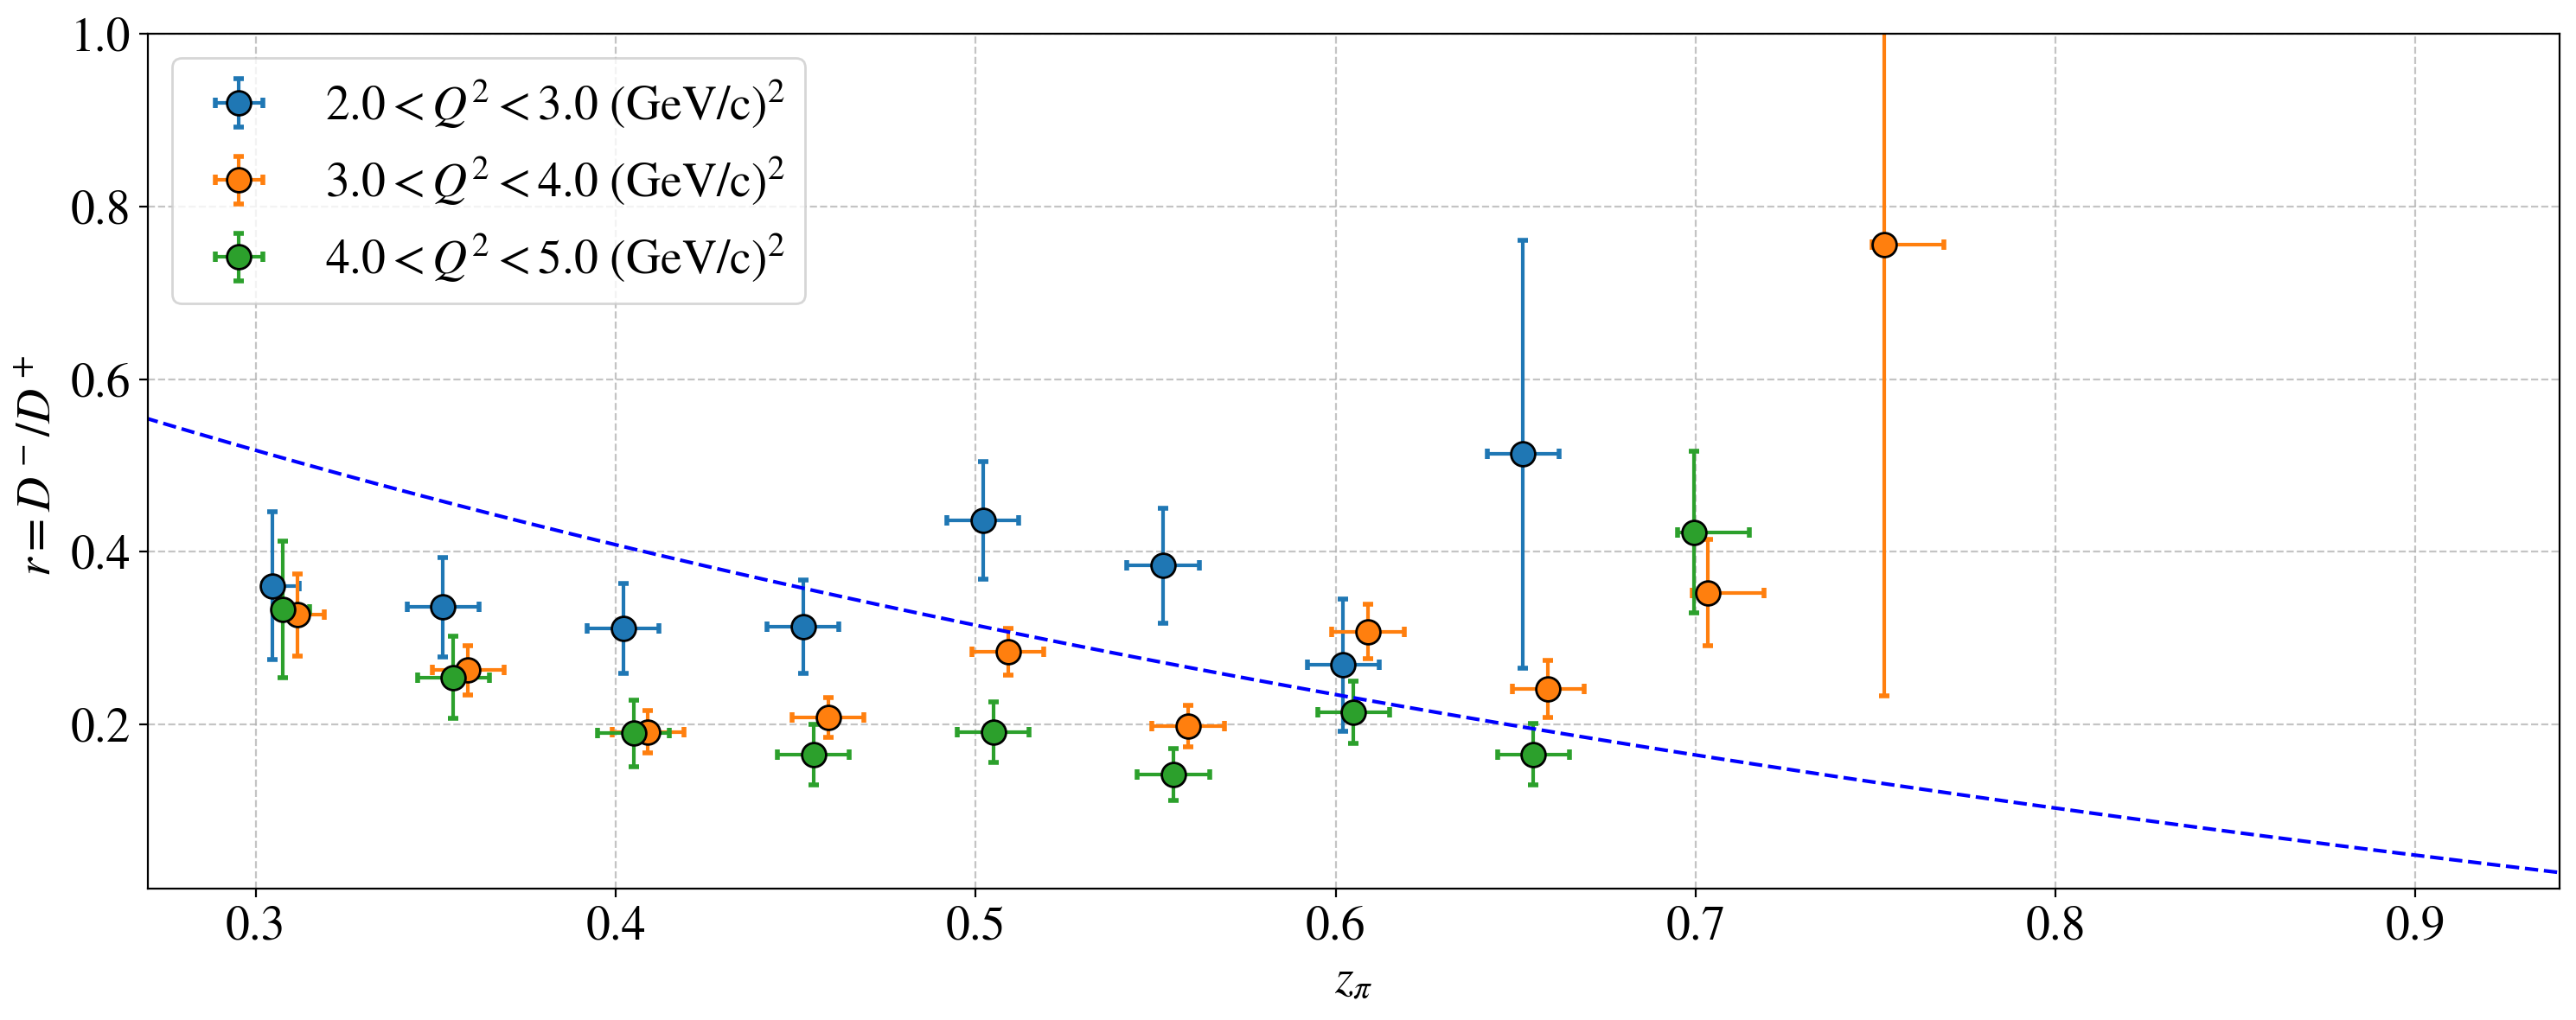

In [135]:
xlim = (0.27,0.94)
ylim = (0.01,1)#

Q2min_2Plot = np.array([2.0,3.0,4.0]); Q2max_2Plot = Q2min_2Plot + 1.0

fig = plt.figure(figsize=(15,6), tight_layout=True);  
ax = fig.add_subplot(1,1,1)
for Q2min,Q2max in zip(Q2min_2Plot,Q2max_2Plot):
    suffix = '_%.1f_Q2_%.1f'%(Q2min,Q2max); 
    result_label = ('$%.1f<Q^2<%.1f$ (GeV/c)$^2$'%(Q2min,Q2max))            
    plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix]+0.01*np.random.uniform(),
                               z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),
                               r     = r_corrected_arr[suffix],
                               r_err = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2,
                               label = result_label, 
                               ax    = ax, 
                               do_add_fit_to_label=False);
        
plot_FF_expectation(ax=ax,formula='(1-z)/(1-z+z/0.46)')
set_axes(ax,'$z_\\pi$',"$r = D^-/D^+$ ", do_add_grid=True, do_add_legend=True, xlim=xlim, ylim=ylim,fontsize=20);    
# ax.legend(bbox_to_anchor=(1,1.05),loc='best',fontsize=18);

## (4.1) $p_T$ bins

Done loading CLASPYTHdirect_SIDIS_ratio_ SIDIS results and extracting r for x=0.32.
From /Users/erezcohen/Desktop/data/BAND/Results/Results_18Aug2023/pT_bins_2.0_Q2_3.0/
For ['_0.00_pT_0.30']
Done loading CLASPYTHdirect_SIDIS_ratio_ SIDIS results and extracting r for x=0.32.
From /Users/erezcohen/Desktop/data/BAND/Results/Results_18Aug2023/pT_bins_3.0_Q2_4.0/
For ['_0.00_pT_0.30']
Done loading CLASPYTHdirect_SIDIS_ratio_ SIDIS results and extracting r for x=0.32.
From /Users/erezcohen/Desktop/data/BAND/Results/Results_18Aug2023/pT_bins_4.0_Q2_5.0/
For ['_0.00_pT_0.30']
Done loading CLASPYTHdirect_SIDIS_ratio_ SIDIS results and extracting r for x=0.32.
From /Users/erezcohen/Desktop/data/BAND/Results/Results_18Aug2023/pT_bins_2.0_Q2_3.0/
For ['_0.30_pT_0.60']
Done loading CLASPYTHdirect_SIDIS_ratio_ SIDIS results and extracting r for x=0.32.
From /Users/erezcohen/Desktop/data/BAND/Results/Results_18Aug2023/pT_bins_3.0_Q2_4.0/
For ['_0.30_pT_0.60']
Done loading CLASPYTHdirect_SIDIS_ratio_

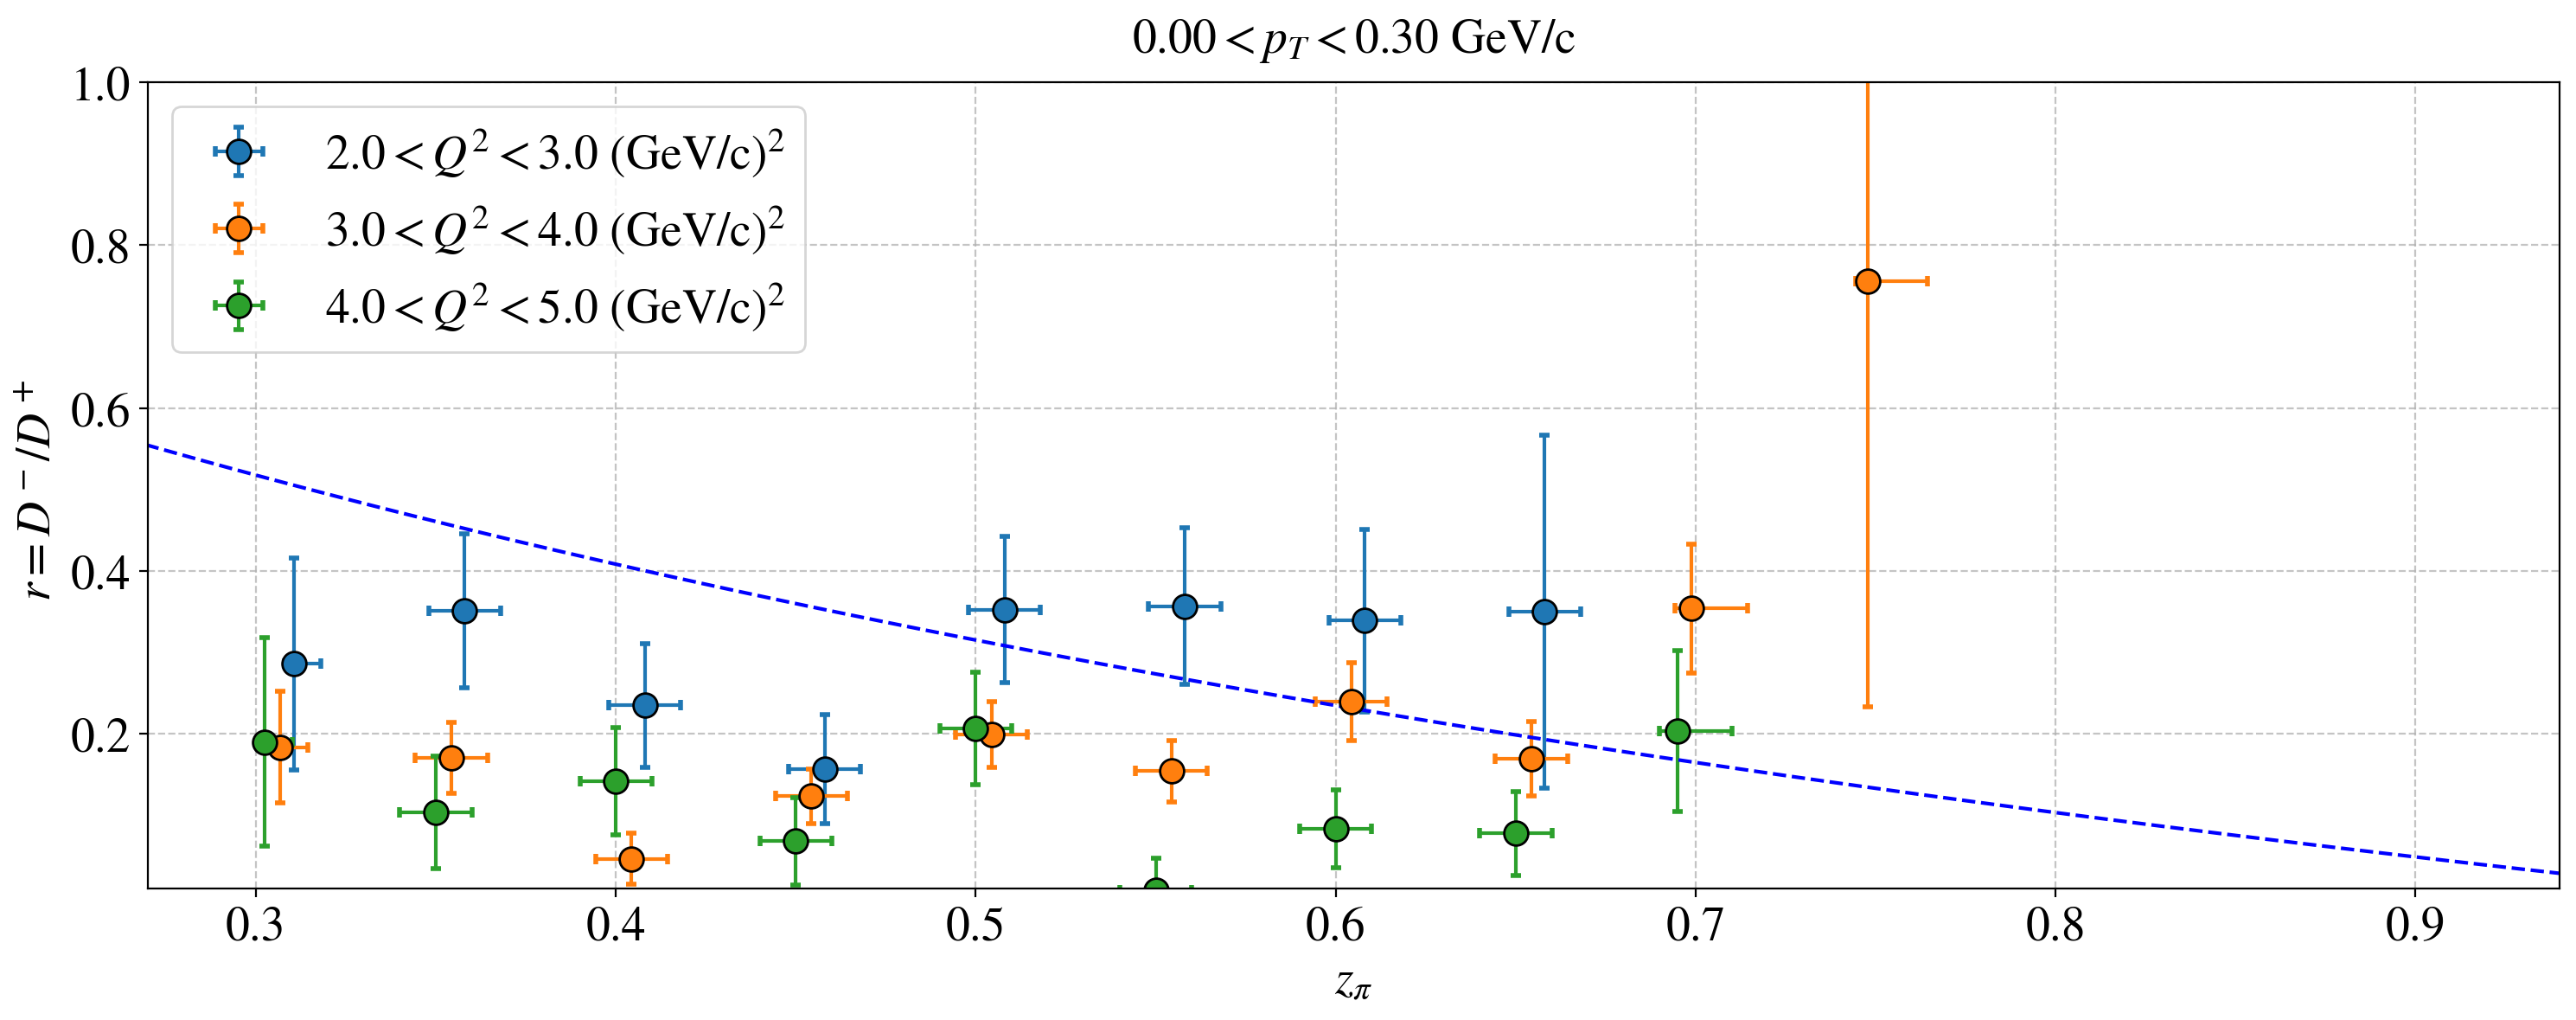

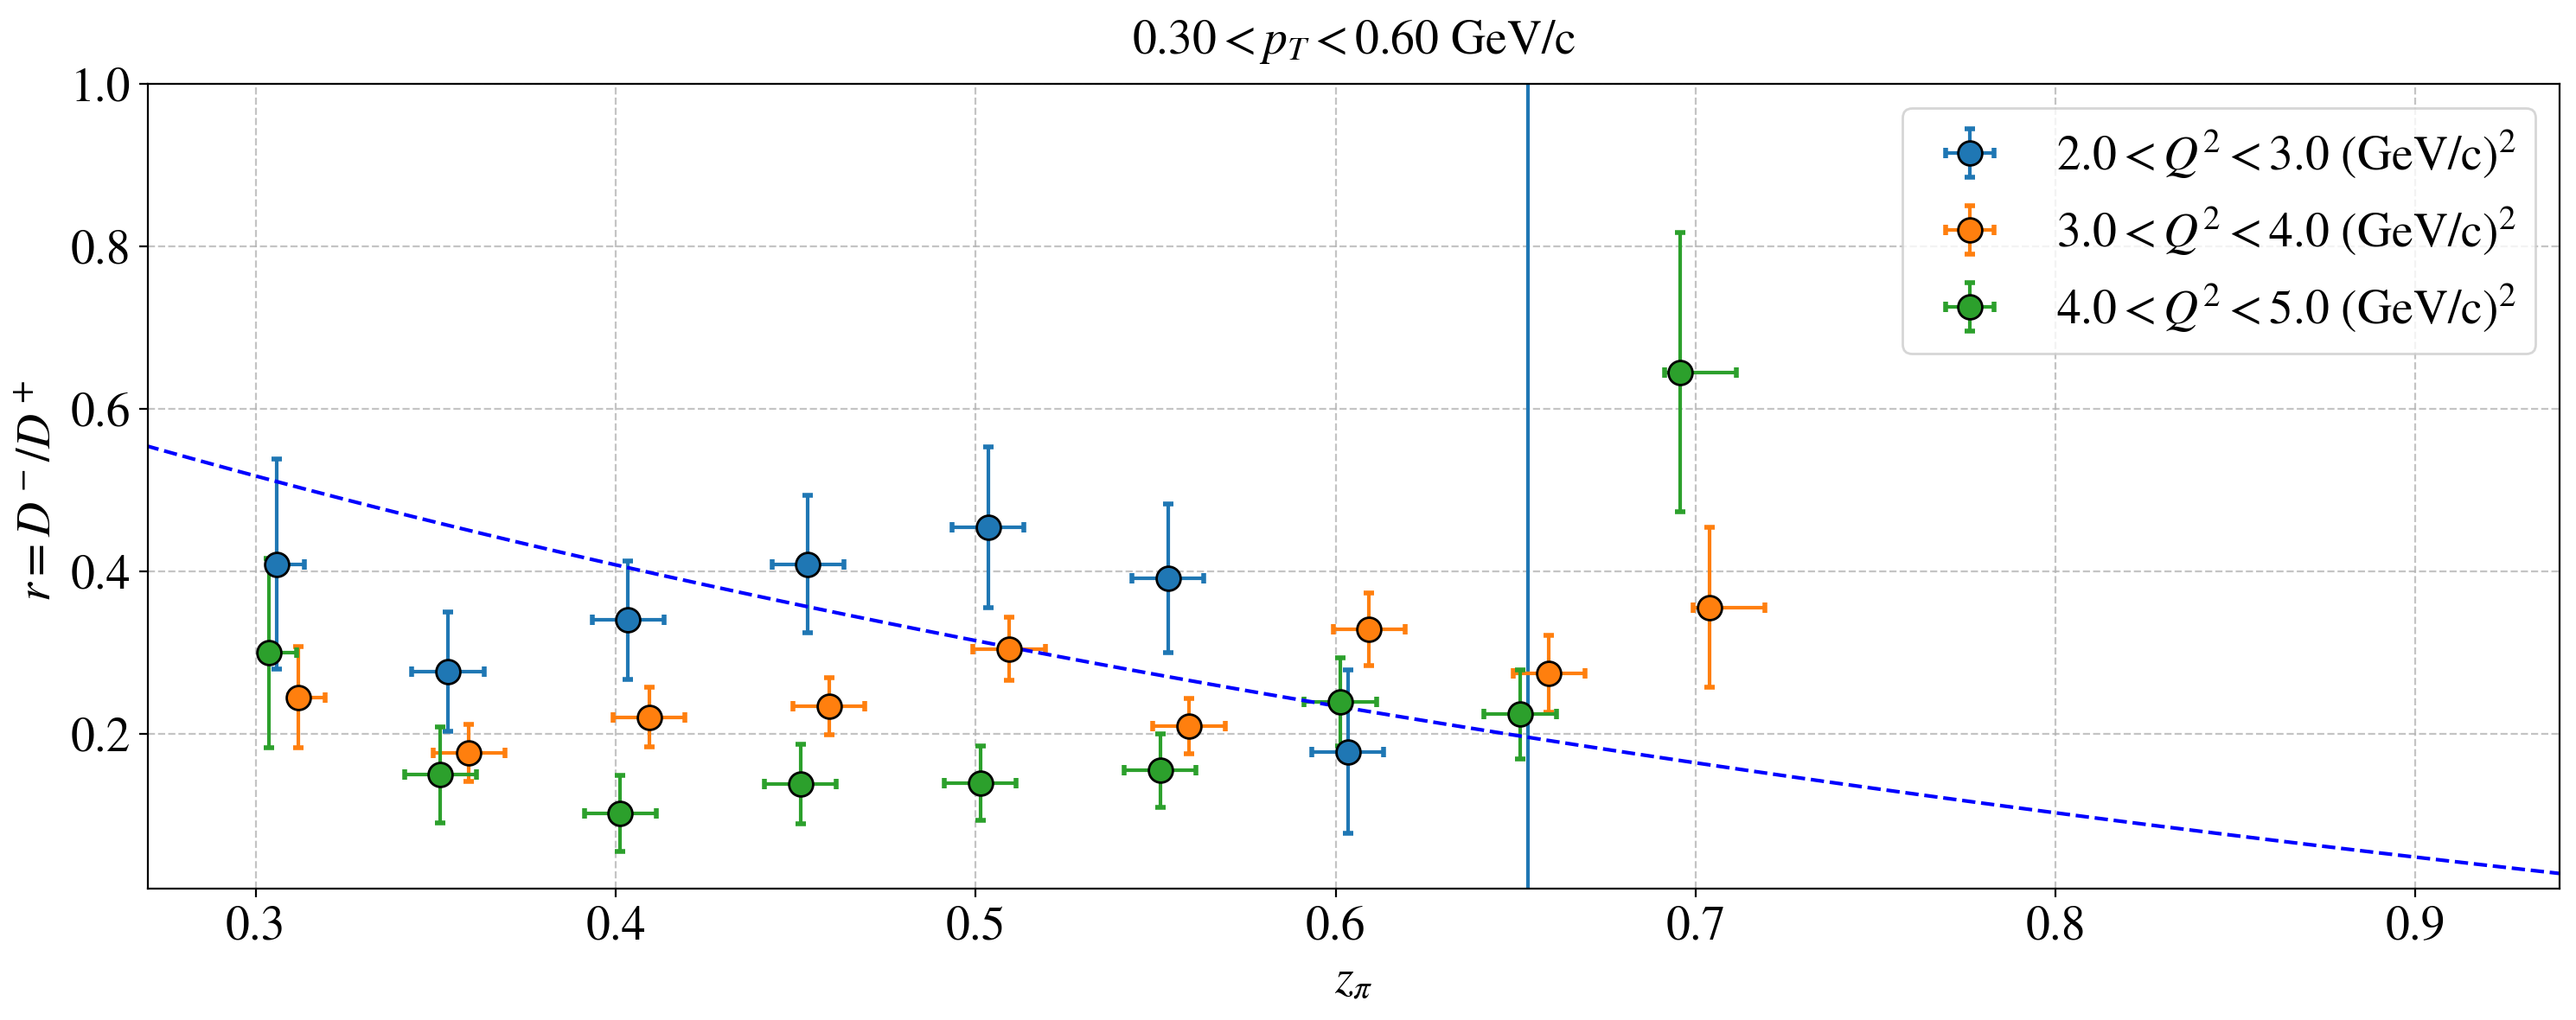

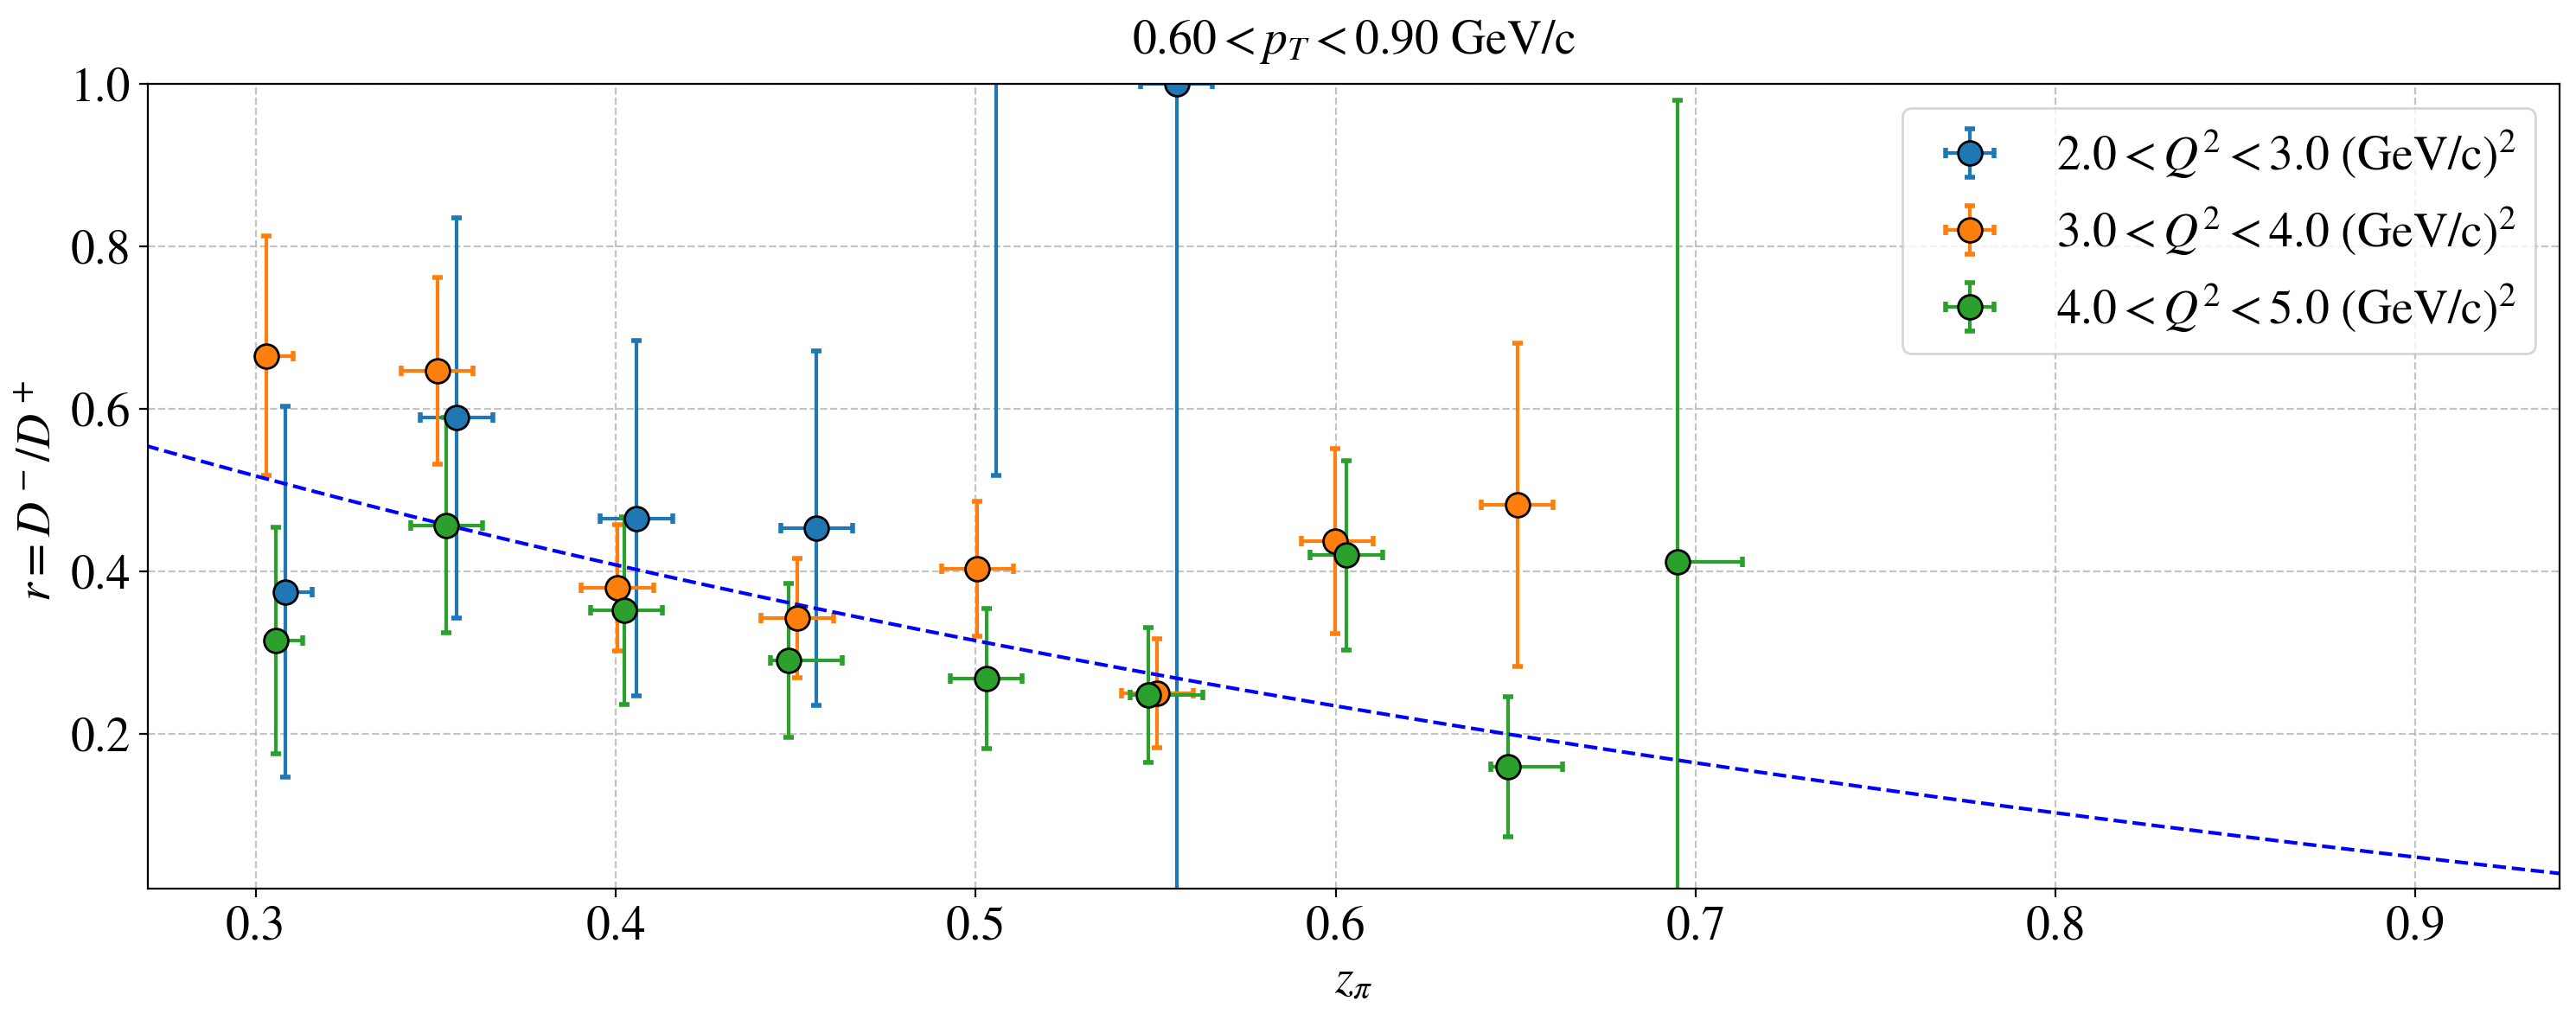

In [136]:
xlim = (0.27,0.94)
ylim = (0.01,1)#

Q2min_2Plot = np.array([2.0,3.0,4.0]); 
Q2max_2Plot = Q2min_2Plot + 1.0

for pT_min,pT_max in zip(pT_min_arr,pT_max_arr):
        
    fig = plt.figure(figsize=(15,6), tight_layout=True);  
    ax = fig.add_subplot(1,1,1)
    
    for Q2_min,Q2_max in zip(Q2min_2Plot,Q2max_2Plot):        
        data_path   = results_path + 'pT_bins_%.1f_Q2_%.1f/'%(Q2_min,Q2_max)
        suffix      = '_%.2f_pT_%.2f'%(pT_min,pT_max)
        r_Results   = extract_r_from_SIDIS_ratio(data_path = data_path,                                                             
                                                 prefix  = prefix,suffixes = [suffix], 
                                                 xB_selected = xB_selected, Delta_xB=Delta_xB,
                                                 fdebug=0)
        [z_arr,z_errdw_arr,z_errup_arr,  r_arr, r_errup_arr, r_errdw_arr,r_corrected_arr, r_corrected_errup_arr, r_corrected_errdw_arr] = r_Results
        
        
        result_label = ('$%.1f<Q^2<%.1f$ (GeV/c)$^2$'%(Q2_min,Q2_max))            
        try:
            plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix]+0.01*np.random.uniform(),
                                       z_err = (z_errdw_arr[suffix], z_errup_arr[suffix]),
                                       r     = r_corrected_arr[suffix],
                                       r_err = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2,
                                       label = result_label, 
                                       ax    = ax, 
                                       do_add_fit_to_label=False);
        except: 
            print('no data for ',result_label);
            print()

    plot_FF_expectation(ax=ax,formula='(1-z)/(1-z+z/0.46)')
    set_axes(ax,'$z_\\pi$',"$r = D^-/D^+$ ",title='$%.2f < p_T < %.2f$ GeV/c'%(pT_min,pT_max), do_add_grid=True, do_add_legend=True, xlim=xlim, ylim=ylim,fontsize=20);    
# ax.legend(bbox_to_anchor=(1,1.05),loc='best',fontsize=18);